<a href="https://colab.research.google.com/github/ydv1412/Bike-Sharing-Demand/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR



from sklearn.feature_selection import chi2
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/capstone project /Supervised_learning_Regression/bike sharing deand prediction/Data _ Resources/SeoulBikeData.csv" , encoding= 'unicode_escape')      ## reading dataset

In [ ]:
df.info()                                                                                   ##### looking for features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Our dataset has 8760 rows and 14 columns.Out of 14 columns ten are numerical,one is date and three are string objects.

In [ ]:
df.head(5)                                                                                          ### having a look of datapoints

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.describe()                                                                        ### distribution of numerical features

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


*Let's see rented bike counts on different dates. If they follow any distribution*

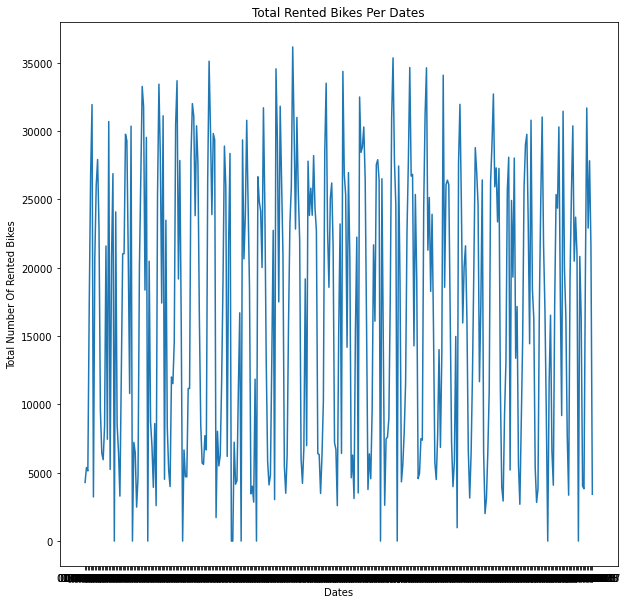

In [ ]:
plt.figure(figsize = (10,10))
df_1 = df.groupby('Date')['Rented Bike Count'].sum().reset_index()                                ### grouping by data and plotting line plot
plt.plot(df_1['Date'] ,df_1['Rented Bike Count'])
plt.xlabel('Dates')
plt.ylabel('Total Number Of Rented Bikes')
plt.title('Total Rented Bikes Per Dates')
plt.show()

*We can see that rented bike count on dates is randomly distributed.Let's see top twenty dates per rented bike counts to see if they are same weekdays or something*

In [ ]:
df_1.sort_values(by = 'Rented Bike Count' , ascending = False).iloc[0:20]                                        ### top 20 Rented bike count by dates

,Date,Rented Bike Count
149,13/06/2018,36149
221,19/06/2018,35349
89,08/06/2018,35103
233,20/06/2018,34639
245,21/06/2018,34621
137,12/06/2018,34544
185,16/06/2018,34360
257,22/06/2018,34079
66,06/07/2018,33676
173,15/06/2018,33492


*We can see that dates are not same weekdays.Now lets see total rented bike counts on each hour*

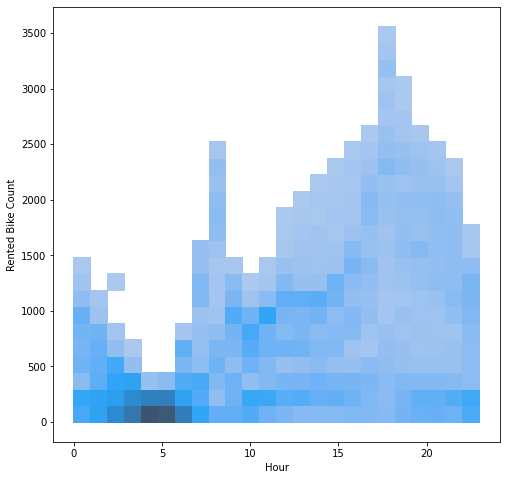

In [ ]:
plt.figure(figsize = (8,8))
sns.histplot(data = df , x = 'Hour' , y = 'Rented Bike Count' , bins = 24 , kde=True)                                    ### hist plot betwee Hour and rented bike count

plt.show()

Observation:
* At 8, 18 and 19th hour rental counts are maximum.
* From 10th to 18th hour rental counts are continuously increasing and then decreases from 18 to 23rd hour.

*Now let's see total rented bike counts in each season*

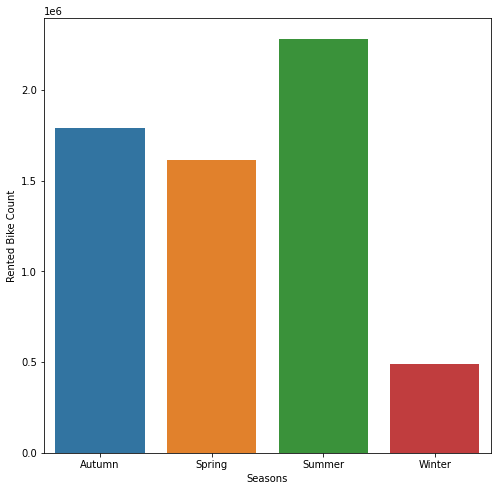

In [ ]:
df_season = df.groupby(by = 'Seasons')['Rented Bike Count'].sum().reset_index()                   ### grouping by seasons and plotting barplot
plt.figure(figsize = (8,8))
sns.barplot(data = df_season , x = 'Seasons' , y = 'Rented Bike Count')

plt.show()

Observation:
* Approx 37 percent of total rental counts have taken place in summer.
* Minimum approx 8 percent of rental counts have taken place in winter.

*Now let's see wheather most rentals have taken place on holidays or non-holidays*

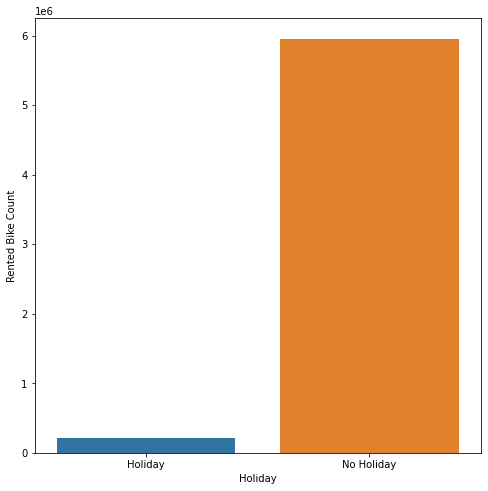

In [ ]:
df_holiday = df.groupby(by = 'Holiday')['Rented Bike Count'].sum().reset_index()                   ### grouping by holidays and plotting bar 
plt.figure(figsize = (8,8))
sns.barplot(data = df_holiday , x = 'Holiday' , y = 'Rented Bike Count')

plt.show()

Observation:
* Approx 97% of the total rentals have taken place on Non-holidays.

*Let's see wheather most rental counts have occured in functioning hours or non-functioning hours.*

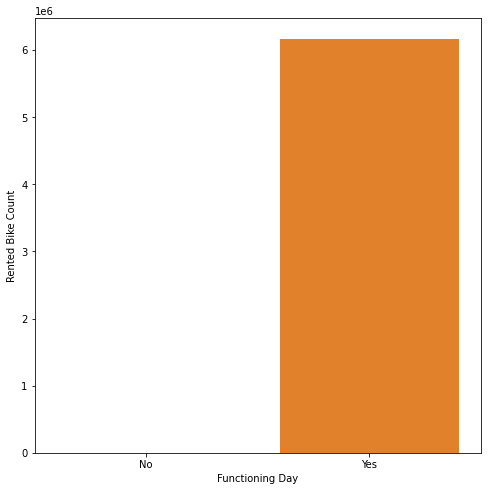

In [ ]:
df_functioning = df.groupby(by = 'Functioning Day')['Rented Bike Count'].sum().reset_index()           ### groupping by functioning day and plotting barplot
plt.figure(figsize = (8,8))
sns.barplot(data = df_functioning , x = 'Functioning Day' , y = 'Rented Bike Count' )

plt.show()

Observation:
* Approx 100 percent of the total rental counts have taken place in functioning hours.

*Now let's add a new weeday column to our dataset to see total rented bike counts on each day.* 

In [ ]:
df['Day'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x , '%d/%m/%Y').weekday())                               ### adding a weekday column to our dataset

In [ ]:
day = ['Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday' , 'Sunday']                                 ### list of days 
df['day_of_week'] = df['Day'].apply(lambda x: day[x])                                                                     #### replacing weekdays number with actual days

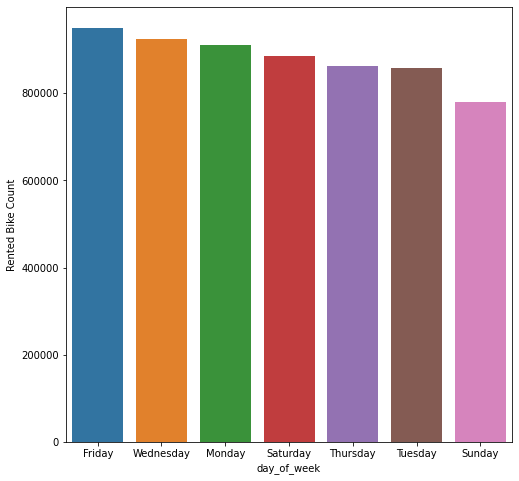

In [ ]:
df_5 = df.groupby(by = 'day_of_week')['Rented Bike Count'].sum().reset_index().sort_values(by = 'Rented Bike Count' , ascending = False)   ### grouping by weekday and plotting bar
plt.figure(figsize = (8,8))

sns.barplot(x = df_5['day_of_week'] , y = df_5['Rented Bike Count'])

plt.show()

Observation
* There is not much difference between rental counts between different weekdays.

*Let's add year, month and date columns also to see if there is increase or decrease in month starting or ending or in particular months*

In [2]:
df['Year'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y').year)                                                ## adding year column
df['Month'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y').month)                                              ## adding month column
df['Date_1'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y').day)                                               ## adding date column

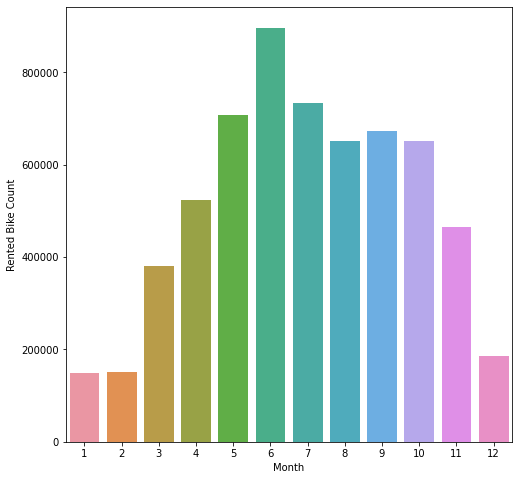

In [ ]:
df_6 = df.groupby(by = 'Month')['Rented Bike Count'].sum().reset_index().sort_values(by = 'Rented Bike Count' , ascending = False)    ### groupping by month to see rental counts by months
plt.figure(figsize = (8,8))

sns.barplot(x = df_6['Month'] , y = df_6['Rented Bike Count'])

plt.show()

Observation
* In month of june rented bike count is maximum.
* In month of january and february the rented boike count is minimum

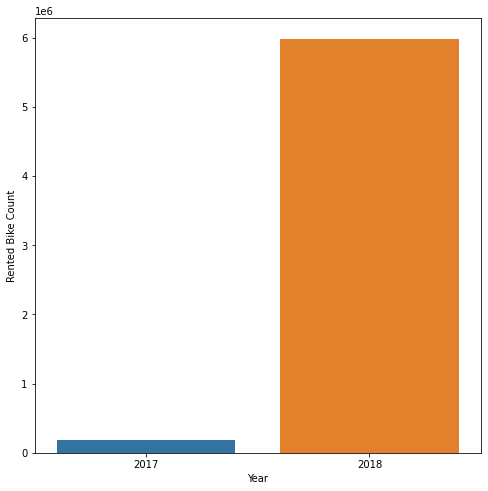

In [ ]:
df_7 = df.groupby(by = 'Year')['Rented Bike Count'].sum().reset_index().sort_values(by = 'Rented Bike Count' , ascending = False)    ### groupping by year and plotting bar
plt.figure(figsize = (8,8))

sns.barplot(x = df_7['Year'] , y = df_7['Rented Bike Count'])

plt.show()

Observation
* Most of the datapoints belong to year 2018.

*Now let's see if the features are correlated*

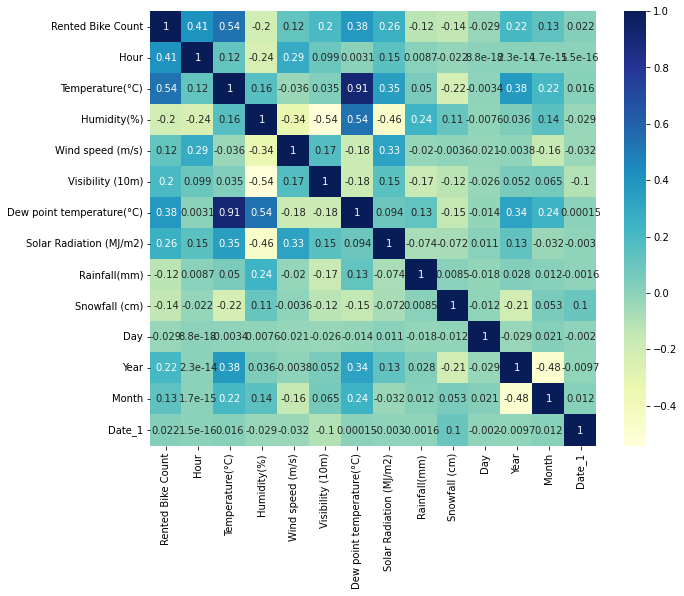

In [ ]:
plt.figure(figsize = (10,8))                                                                ### plotting correlation matri between all numerical columns

corr_matrix = df.corr()
sns.heatmap(corr_matrix , annot = True, cmap = 'YlGnBu')

plt.show()

Observation:
* Bike Counts increases as Temperature increases.
* Bike Count is also proportional to Hour to a little extent.
* Bike count increases as Dew Point temperature increases.
* Bike count is also proportional to visibility,wind speed and solar radiation but very weak proportionality.
*Bike count also decreases as snowfall,rainfall and humidity increases with a very weak inverse propportionality.
* Bike count is not at all dependent on the day of week.
* Bike count is least correlated with day and date features.

*We are dropping day and Date columns due to weak correlation*

In [ ]:
df.drop(['Date_1' , 'day_of_week'] , inplace = True , axis = 1)                                            ### dropping day and date columns

*Now let's see if there is any correlation between categorical features.Before that we have to convert different categories to integers.*

In [ ]:
columns = ['Functioning Day' , 'Holiday' , 'Seasons']                                                       ### creating another dataset to see correlation between categorical variables and rented bike count
df_2 = df[columns].copy()
df_2['Functioning Day'] = df_2['Functioning Day'].map({'Yes':1 , 'No':0})                                   ## mapping categorical values with numerical ones
df_2['Holiday'] = df_2['Holiday'].map({'No Holiday':0 , 'Holiday':1 })
df_2['Seasons'] = df_2['Seasons'].map({'Summer':0 , 'Winter':1 , 'Autumn':2 , 'Spring':3})

In [ ]:
x = df_2                                                                                                   ### categorical columns
y =df['Rented Bike Count']                                                                                 ### class label

fscore = chi2(x,y)                                                                                         ## performing chi2
fscore

(array([ 295.        , 1747.34934301, 2284.18517366]),
 array([1.        , 1.        , 0.03679722]))

*Let's visualise chi_sq on heatmap*

Text(0.5, 1.0, 'Chi-Square Test Results')

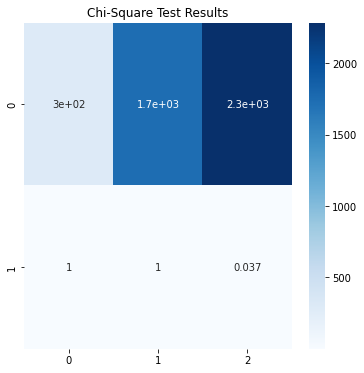

In [ ]:
plt.figure(figsize = (6,6))
sns.heatmap(fscore, annot=True, cmap='Blues')                                                             ## plotting heatmap on chi_sq
plt.title('Chi-Square Test Results')

Observation
* For Seasons and Rented Bike Count p <"0.05".
* For Holiday and Functioning Day p value is 1.

*Now let's convert categorical features to numerical via one hot encoding*

In [ ]:
different_seasons = pd.get_dummies(df['Seasons'])                                                        ## one hot encoding seasons 
df = pd.merge(df,different_seasons , how = 'left' , left_index = True , right_index = True)              ### merging crated dummy with df                

In [ ]:
different_holiday = pd.get_dummies(df['Holiday'])                                                        ## one hot encoding holiday 
df = pd.merge(df,different_holiday , how = 'left' , left_index = True , right_index = True)              ## merging dummy with df

In [ ]:
different_Functioning_Day = pd.get_dummies(df['Functioning Day'])                                        ## one hot encoding Functioning day and merging with df
df = pd.merge(df,different_Functioning_Day , how = 'left' , left_index = True , right_index = True)

*Now dropping categorical columns as we have one hot encoded them.*

In [ ]:
df = df.drop(['Seasons' , 'Holiday_x' ,'Functioning Day' ] , axis = 1)

In [ ]:
df.drop(['Date'] , axis = 1 , inplace = True)                                                                     ### dropping Date colum

*Now we are dropping the duplicate datapoints from our dataset (if exists).*

In [ ]:
df.drop_duplicates(keep = 'first' , inplace = True)                                                                

*Now let's perform column standardisation on each of numerical columns.*

In [ ]:
list1 = list(df.columns)                                                                                        ### listing the columns
list1.remove('Rented Bike Count')                                                                                 # removing class label column

In [ ]:
for column in list1:                                                                                             #### column standardising
    df[column] = df[column].apply(lambda x :( (x-df[column].mean())/(df[column].max()-df[column].min()))) 

In [ ]:
df.describe()                                                                                                     ### waching distribution

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Year,Month,Autumn,Spring,Summer,Winter,Holiday_y,No Holiday,No,Yes
count,8760.000000,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,...,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03
mean,704.602055,1.901067e-20,-5.183480e-16,1.675695e-16,-9.791278e-16,2.316133e-17,-1.704782e-16,-2.104538e-15,-1.202383e-16,1.808536e-16,...,-9.904771e-14,-1.504644e-15,-9.068165e-15,3.413822e-15,3.413822e-15,-3.223392e-14,1.313224e-15,-1.312395e-15,4.229242e-15,-4.223004e-15
std,644.997468,3.009818e-01,2.088256e-01,2.077797e-01,1.400405e-01,3.083116e-01,2.259579e-01,2.468029e-01,3.223408e-02,4.963025e-02,...,2.787957e-01,3.134589e-01,4.326412e-01,4.342173e-01,4.342173e-01,4.310419e-01,2.165374e-01,2.165374e-01,1.804036e-01,1.804036e-01
min,0.000000,-5.000000e-01,-5.364147e-01,-5.941455e-01,-2.330958e-01,-7.145595e-01,-5.998930e-01,-1.616792e-01,-4.248206e-03,-8.530511e-03,...,-9.150685e-01,-5.023661e-01,-2.493151e-01,-2.520548e-01,-2.520548e-01,-2.465753e-01,-4.931507e-02,-9.506849e-01,-3.367580e-02,-9.663242e-01
25%,191.000000,-2.500000e-01,-1.640371e-01,-1.655740e-01,-1.114741e-01,-2.518124e-01,-1.517961e-01,-1.616792e-01,-4.248206e-03,-8.530511e-03,...,8.493151e-02,-2.296389e-01,-2.493151e-01,-2.520548e-01,-2.520548e-01,-2.465753e-01,-4.931507e-02,4.931507e-02,-3.367580e-02,3.367580e-02
50%,504.500000,0.000000e+00,1.428457e-02,-1.251281e-02,-3.039306e-02,1.323742e-01,1.775410e-02,-1.588383e-01,-4.248206e-03,-8.530511e-03,...,8.493151e-02,4.308842e-02,-2.493151e-01,-2.520548e-01,-2.520548e-01,-2.465753e-01,-4.931507e-02,4.931507e-02,-3.367580e-02,3.367580e-02
75%,1065.250000,2.500000e-01,1.681307e-01,1.609566e-01,7.771504e-02,2.854405e-01,1.855742e-01,1.025254e-01,-4.248206e-03,-8.530511e-03,...,8.493151e-02,3.158157e-01,-2.493151e-01,7.479452e-01,7.479452e-01,-2.465753e-01,-4.931507e-02,4.931507e-02,-3.367580e-02,3.367580e-02
max,3556.000000,5.000000e-01,4.635853e-01,4.058545e-01,7.669042e-01,2.854405e-01,4.001070e-01,8.383208e-01,9.957518e-01,9.914695e-01,...,8.493151e-02,4.976339e-01,7.506849e-01,7.479452e-01,7.479452e-01,7.534247e-01,9.506849e-01,4.931507e-02,9.663242e-01,3.367580e-02


*Let's check Temperature, Humidity, Wind speed, Visibility, Dew point temperature, Solar Radiation, Rainfall and Snowfall columns for outliers.* 

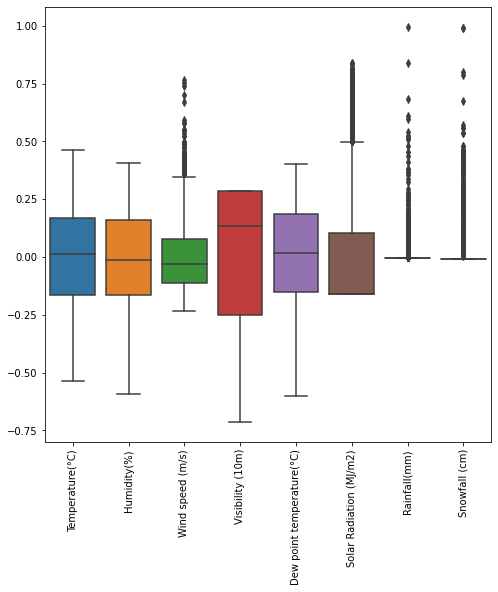

In [ ]:
columns = ['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)' , 'Solar Radiation (MJ/m2)' , 'Rainfall(mm)' , 'Snowfall (cm)']    #### listing columns

plt.figure(figsize = (8,8))
sns.boxplot(data = df[columns])                                                                                                                                                  ###plotting boxplot

plt.xticks(rotation  = 90)
plt.show()

Observation
* Windspeed ,Solar Radiation , Rainfall and Snowfall have many extreme points which could be outliers.

*Let's see their violin distribution.*

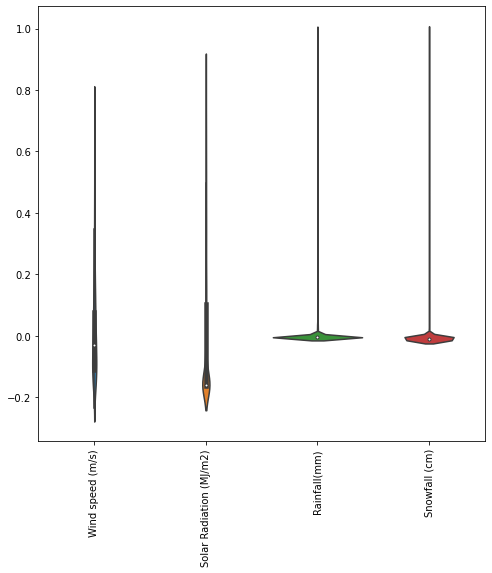

In [ ]:
columns = ['Wind speed (m/s)' , 'Solar Radiation (MJ/m2)' , 'Rainfall(mm)' , 'Snowfall (cm)']

plt.figure(figsize = (8,8))
sns.violinplot(data = df[columns])                                                                       ### plotting violin plot for Windspeed  , Solar Radiation , Rainfall , Snowfall
 
plt.xticks(rotation  = 90)
plt.show()

*Let's see their individual PDF's*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


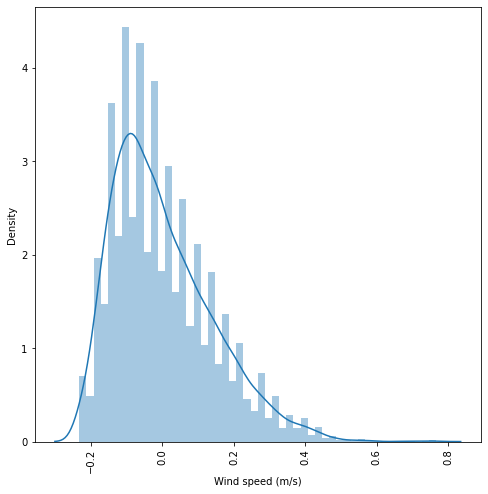

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(df['Wind speed (m/s)'])                                                              ### probability density plot for windspeed
plt.xticks(rotation  = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


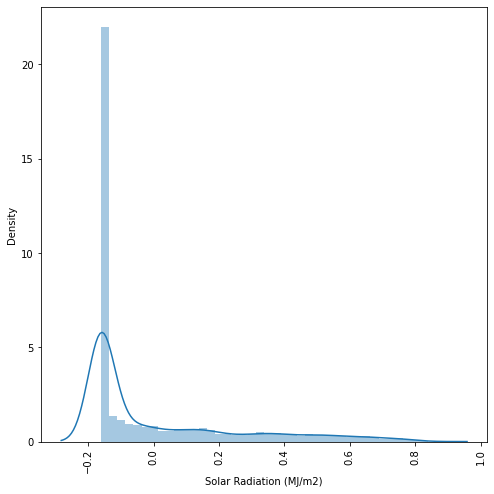

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(df['Solar Radiation (MJ/m2)'])                                                      ### probability density plot for Solar Radiation
plt.xticks(rotation  = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


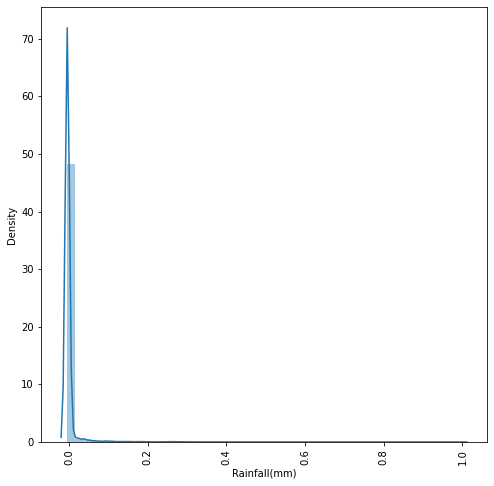

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(df['Rainfall(mm)'])                                                             ### probability density plot for Rainfall
plt.xticks(rotation  = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


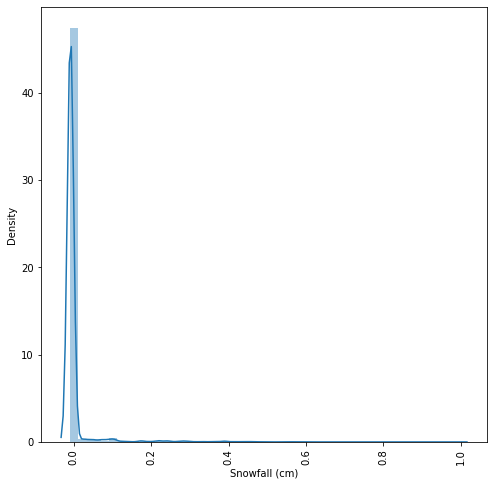

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(df['Snowfall (cm)'])                                                                 ## probability density plot for Snowfall
plt.xticks(rotation  = 90)
plt.show()

*Let's see their min, mean and max values.*

In [ ]:
columns = ['Wind speed (m/s)' , 'Solar Radiation (MJ/m2)' , 'Rainfall(mm)' , 'Snowfall (cm)']                               ## listing columns

df[columns].describe()

,Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03
mean,-9.791278e-16,-2.104538e-15,-1.202383e-16,1.808536e-16
std,1.400405e-01,2.468029e-01,3.223408e-02,4.963025e-02
min,-2.330958e-01,-1.616792e-01,-4.248206e-03,-8.530511e-03
25%,-1.114741e-01,-1.616792e-01,-4.248206e-03,-8.530511e-03
50%,-3.039306e-02,-1.588383e-01,-4.248206e-03,-8.530511e-03
75%,7.771504e-02,1.025254e-01,-4.248206e-03,-8.530511e-03
max,7.669042e-01,8.383208e-01,9.957518e-01,9.914695e-01


Observation-
* From the PDF's we could say that all the columns Wind speed, Solar Radiation ,Rainfall , Snowfall are positively skewed. 
* These features have huge difference between 75th percentile and max values.
* Solar radiation, Rainfall , snowfall are more mean centered whereas Windspeed has more spread.

<b> Now let's remove outliers.

In [ ]:
for colmn in columns:                                                           ### using IQR to remove outliers
  Q3 = df[colmn].quantile(0.75)                                                  ## quantile 3
  Q1 = df[colmn].quantile(0.25)                                                 ## quantile 1
  IQR = Q3-Q1                                                                     ## inter quantile range
  df = df[(df[colmn]>= Q1-IQR) & (df[colmn]<= Q3+IQR)]                            ### removing points outside quantile range

*Let's see with how many points we are remaining with.*

In [ ]:
df.shape

(6283, 21)

After removing outliers and featurisation we are remaining with 6283 rows and 21 columns.

Now we are done with data analysis let's move towards model creation.

<b>Model Creation

KNN Regressor

In [ ]:
x = df.drop(['Rented Bike Count'],axis = 1)          ## features
y = df['Rented Bike Count']                          ## class labels

In [ ]:
model = KNeighborsRegressor()
n_params = {'n_neighbors' : np.arange(1,100,2) , 'weights' : ['uniform' , 'distance']}

cv = GridSearchCV(model , param_grid = n_params , cv = 5)                                    ### using gridsearch for choosing best hyper parameters

In [ ]:
cv.fit(x,y)                                                                  ### training

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'weights': ['uniform', 'distance']})

In [ ]:
print(cv.best_params_)                        ### best parameters 
print(cv.best_score_)                         ### best score

{'n_neighbors': 11, 'weights': 'distance'}
0.2220559318081589


In [ ]:
x_train1 , x_test1, y_train1 , y_test1 = train_test_split(x , y , test_size = 0.2)                  #### splitting dataset into train and test dataset
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(5026, 20)
(1257, 20)
(5026,)
(1257,)


In [ ]:
k_regressor = KNeighborsRegressor(n_neighbors=11 , weights = 'distance')                    ## training regressor with 11 neighbors and distance weights
s = k_regressor.fit(x_train1 , y_train1)
predicted_y = s.predict(x_test1)                                                            ## predicting values
mean_square_error = mean_squared_error(predicted_y , y_test1 , squared = False)             ### mean square values 
print("For k = 11 and weights =  distance mean_square_error value is {} ".format(mean_square_error))

For k = 11 and weights =  distance mean_square_error value is 284.34344932000045 


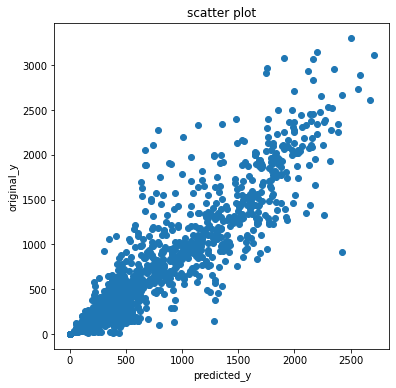

In [ ]:
plt.figure(figsize = (6,6))
plt.scatter(predicted_y , y_test1)        ### plotting predicted and actual values on 2d
plt.xlabel("predicted_y")
plt.ylabel("original_y")
plt.title("scatter plot")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


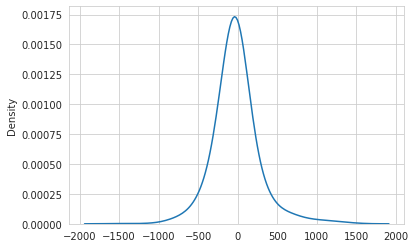

In [ ]:
error = y_test1 - predicted_y                       ### calcualating errors and plotting errors on kdeplot
sns.set_style('whitegrid')
sns.kdeplot(np.array(error) , bw = 0.5)  ### bw is smoothing parameter
plt.show()

In [ ]:
corr_matrix = np.corrcoef(y_test1,predicted_y)                    #### calculating R_sq matrix for knnregressor
corr = corr_matrix[0,1]
r_sq = corr**2
print("For k = 11 and weights =  distance R_Sq matrix value is {} ".format(r_sq))

For k = 11 and weights =  distance R_Sq matrix value is 0.8243281308609833 


In [ ]:
error = mean_squared_log_error(predicted_y , y_test1)              ### mean_squared_log error
print("For k = 11 and weights =  distance Mean Squred Log Error is is {} ".format(error))

For k = 11 and weights =  distance Mean Squred Log Error is is 0.26602377695970597 


Conclusion:
* KNNRegressor gives best results when N_neighbour value is 11 and distance is weighted.
* KNNRegressor gives mean_square_error of 284.
* Rsq value for KNNRegressor is 0.82
* Mean squared log error is 0.266

Linear Regression

In [ ]:
model2 = LinearRegression()                        ### linear regression object
model2.fit(x_train1 , y_train1)
predicted_y2 = model2.predict(x_test1)

In [ ]:
mean_square_error = mean_squared_error(predicted_y2 , y_test1 , squared = False)                ## mean_sq_error
print("For Linear Regression mean_square_error is {} ".format(mean_square_error))

For Linear Regression mean_square_error is 431.40645288116644 


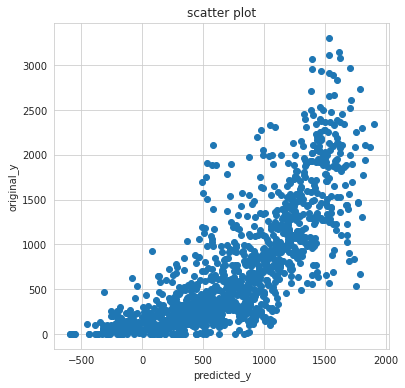

In [ ]:
plt.figure(figsize = (6,6))                                             ### plotting scatter plot between actual_y and predicted_y
plt.scatter(predicted_y2 , y_test1)
plt.xlabel("predicted_y")
plt.ylabel("original_y")
plt.title("scatter plot")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


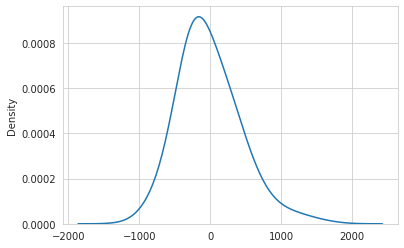

In [ ]:
error = y_test1 - predicted_y2                                    ### calculating errors
sns.set_style('whitegrid')
sns.kdeplot(np.array(error) , bw = 0.5)                            ### bw is smoothing parameter
plt.show()

In [ ]:
corr_matrix = np.corrcoef(y_test1,predicted_y2)                 ### r_sq value
corr = corr_matrix[0,1]
r_sq = corr**2
print("For Linear Regression R_Sq matrix value is {} ".format(r_sq))

For Linear Regression R_Sq matrix value is 0.594234729783998 


Conclusion:
* Linear Regression is working bad then KNNRegressor
* Mean_sq_error for linear regression model is 431
* r2 value is approx 0.6

Support Vector Regressor

In [ ]:
n_params = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'] , 'gamma' : ['scale' , 'auto']}            ### parameters

In [ ]:
model3 = SVR()                                                                 ## support vector regressor
cv2 = GridSearchCV(model3 , param_grid = n_params , cv = 10)                   ## gridsearch 
cv2.fit(x, y)


GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
print(cv2.best_params_)               ## best parameters
print(cv2.best_score_)                ## best scores

{'gamma': 'scale', 'kernel': 'linear'}
0.045900084273244365


In [ ]:
model3 = SVR(gamma = 'scale' , kernel = 'linear')                            ### using best parameters
model3.fit(x_train1 , y_train1)
predicted3 = model3.predict(x_test1)

In [ ]:
mean_square_error = mean_squared_error(predicted3 , y_test1 , squared = False)            ## mean square error
print("For SVR mean_square_error is {} ".format(mean_square_error))

For SVR mean_square_error is 529.171519413859 


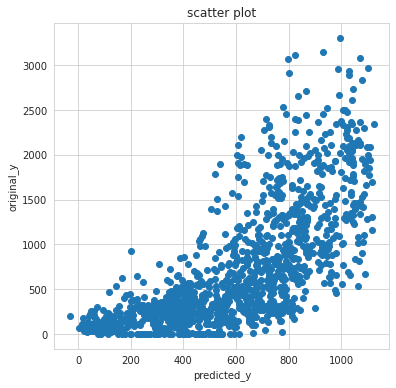

In [ ]:
plt.figure(figsize = (6,6))                                        ## plotting scatter
plt.scatter(predicted3 , y_test1)
plt.xlabel("predicted_y")
plt.ylabel("original_y")
plt.title("scatter plot")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


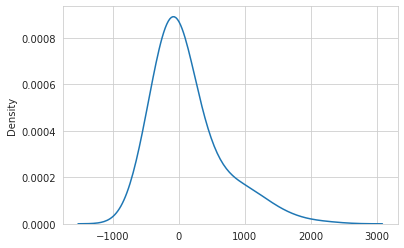

In [ ]:
error = y_test1 - predicted3                                #plotting error
sns.set_style('whitegrid')
sns.kdeplot(np.array(error) , bw = 0.5)  ### bw is smoothing parameter
plt.show()

In [ ]:
corr_matrix = np.corrcoef(y_test1,predicted3)                ### R2 value
corr = corr_matrix[0,1]
r_sq = corr**2
print("For SVR R_Sq matrix value is {} ".format(r_sq))

For SVR R_Sq matrix value is 0.5165745853559175 


Conclusion:
* SVR is working bad then bot KNNREgressor and Linerar Regression
* Mean_sq_error for svr is 529
* r2 cofficient for svr is 0.51 slightly better then mean model.

Decision Tree 

In [ ]:
model4 = DecisionTreeRegressor()
model4.fit(x_train1 , y_train1)
cross_validation_score = cross_val_score(model4 , x_train1 , y_train1 ,cv =10)                         ### performing 10 fold cross validation
print(cross_validation_score)

[0.84298683 0.85966577 0.85593562 0.85358285 0.86591891 0.89273896
 0.90161822 0.84599075 0.88143299 0.85404989]


In [ ]:
model4.fit(x_train1 , y_train1)
predicted_y4 = model4.predict(x_test1)

In [ ]:
mean_square_error = mean_squared_error(predicted_y4 , y_test1 , squared = False)                ## mean_sq_error
print("For DT Regressor mean_square_error is {} ".format(mean_square_error))

For DT Regressor mean_square_error is 244.58296459729422 


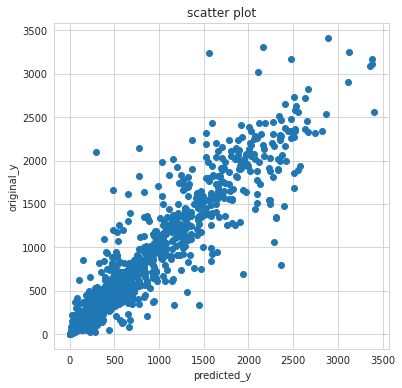

In [ ]:
plt.figure(figsize = (6,6))
plt.scatter(predicted_y4 , y_test1)        ### plotting predicted and actual values on 2d
plt.xlabel("predicted_y")
plt.ylabel("original_y")
plt.title("scatter plot")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


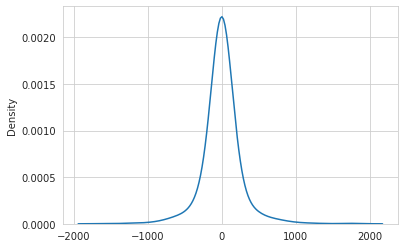

In [ ]:
error = y_test1 - predicted_y4                       ### calcualating errors and plotting errors on kdeplot
sns.set_style('whitegrid')
sns.kdeplot(np.array(error) , bw = 0.5)  ### bw is smoothing parameter
plt.show()

In [ ]:
corr_matrix = np.corrcoef(y_test1,predicted_y4)                ### R2 value
corr = corr_matrix[0,1]
r_sq = corr**2
print("For DT Regressor R_Sq matrix value is {} ".format(r_sq))

For DT Regressor R_Sq matrix value is 0.8748617581549044 


Conclusion:

* Mean_sq_error for DT Regressor is 244
* r2 cofficient for DT Regressor is 0.87.

Random Forest Regressor

In [ ]:
model5 = RandomForestRegressor()                                      ### random forest regression model
model5.fit(x_train1 , y_train1)                                                     
cross_validation_score = cross_val_score(model5 , x_train1 , y_train1 ,cv = 10)           ### ten fold cross validation
print(cross_validation_score)

[0.92265294 0.92231477 0.92308707 0.92911494 0.90942087 0.95482842
 0.95173494 0.93526109 0.93163736 0.93245134]


In [ ]:
predicted_y5 = model5.predict(x_test1)

In [ ]:
mean_square_error = mean_squared_error(predicted_y5 , y_test1 , squared = False)                ## mean_sq_error
print("For RF regressor mean_square_error is {} ".format(mean_square_error))

For RF regressor mean_square_error is 162.65681223932793 


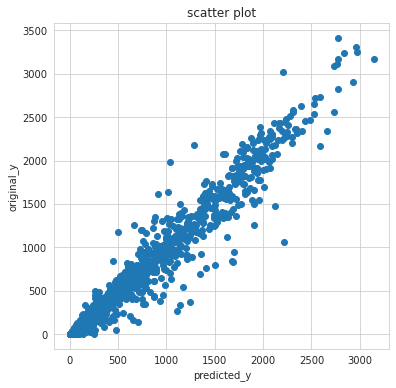

In [ ]:
plt.figure(figsize = (6,6))
plt.scatter(predicted_y5 , y_test1)        ### plotting predicted and actual values on 2d
plt.xlabel("predicted_y")
plt.ylabel("original_y")
plt.title("scatter plot")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


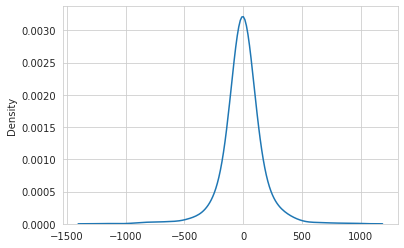

In [ ]:
error = y_test1 - predicted_y5                       ### calcualating errors and plotting errors on kdeplot
sns.set_style('whitegrid')
sns.kdeplot(np.array(error) , bw = 0.5)  ### bw is smoothing parameter
plt.show()

In [ ]:
corr_matrix = np.corrcoef(y_test1,predicted_y5)                ### R2 value
corr = corr_matrix[0,1]
r_sq = corr**2
print("For RF Regressor R_Sq matrix value is {} ".format(r_sq))

For RF Regressor R_Sq matrix value is 0.9436077180476907 


Conclusion:

* Mean_sq_error for DT Regressor is 162
* r2 cofficient for DT Regressor is 0.94.

Gradient Boostion Regressor

In [ ]:
model6 = GradientBoostingRegressor()
model6.fit(x_train1 , y_train1)
cross_validation_score = cross_val_score( model6 , x_train1 , y_train1 , cv = 10)
print(cross_validation_score)

[0.8720166  0.87576988 0.86470412 0.8775986  0.84988843 0.90388727
 0.90184153 0.88174741 0.88637753 0.88110839]


In [ ]:
predicted_y6 = model6.predict(x_test1)

In [ ]:
mean_square_error = mean_squared_error(predicted_y6 , y_test1 , squared = False)                ## mean_sq_error
print("For GB regressor mean_square_error is {} ".format(mean_square_error))

For GB regressor mean_square_error is 218.86941997157334 


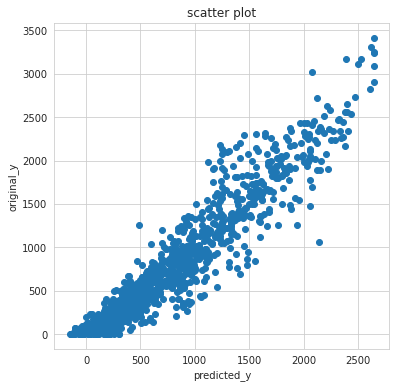

In [ ]:
plt.figure(figsize = (6,6))
plt.scatter(predicted_y6 , y_test1)        ### plotting predicted and actual values on 2d
plt.xlabel("predicted_y")
plt.ylabel("original_y")
plt.title("scatter plot")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


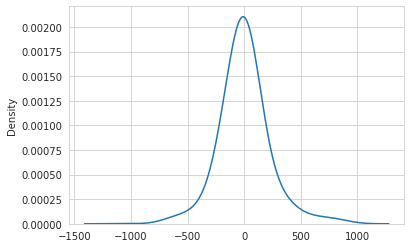

In [ ]:
error = y_test1 - predicted_y6                       ### calcualating errors and plotting errors on kdeplot
sns.set_style('whitegrid')
sns.kdeplot(np.array(error) , bw = 0.5)  ### bw is smoothing parameter
plt.show()

In [ ]:
corr_matrix = np.corrcoef(y_test1,predicted_y6)                ### R2 value
corr = corr_matrix[0,1]
r_sq = corr**2
print("For GB Regressor R_Sq matrix value is {} ".format(r_sq))

For GB Regressor R_Sq matrix value is 0.9003144581417926 


Conclusion:

* Mean_sq_error for GB Regressor is 218
* r2 cofficient for GB Regressor is 0.90.

<b> Final Conclusion:
* The best model we could get is Random Forest classifier which has a mean square error 162 and r_sq value is 0.94